In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact, Output, VBox, HBox, FloatSlider, Checkbox, Dropdown

from numpy import cos,sin,pi,tan,log,exp,array,linspace,arange, cross, dot, sqrt
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch

# from ipykernel.pylab.backend_inline import flush_figures
# %matplotlib inline
%matplotlib widget


# Uncomment the one that corresponds to your Jupyter theme
# plt.style.use('dark_background')
plt.style.use('default')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    'figure.figsize': (7,7),
#    "text.usetex": True,
##     "font.family": "serif",
})

In [2]:
%%HTML
<style>
td {
  font-size: 1.5em
}
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


<p style="padding-bottom:40%;"> </p>

# One-minute Review

## Vector Operations

Let $\vec v, \vec w$ be vectors in $\RR^n$ and $c$ a scalar. 

| Operation | Notation | Formula | Output |
|---|---| --- |---|
| scalar multiplication | $$c \vec v$$ | $$\langle c v_1, \ldots ,c v_n \rangle $$| vector |
| vector addition | $$\vec v + \vec w$$ | $$\langle v_1 + w_1,\ldots, v_n + w_n \rangle $$| vector |
| dot product | $$\vec v \cdot \vec w$$ | $$v_1 w_1 + \cdots + v_n w_n  $$| scalar |
| cross product | $$\vec v \times \vec w$$ | $$ \begin{vmatrix} \vec i & \vec j & \vec k \\v_1 & v_2 & v_3 \\ w_1 & w_2 & w_3 \\ \end{vmatrix} $$| 3-vector |

<p style="padding-bottom:40%;"> </p>

# Lecture 04

  - Objectives

    - Finish geometrical problems with points/lines/planes.
    - Introduce parametrized curves (i.e., vector-valued functions).
  
  - Resources
    - Content
      - Stewart: §12.5–6
      - New Strang: [§2.5](https://cnx.org/contents/oxzXkyFi@5.30:YM6I55EW@6/2-5-Equations-of-Lines-and-Planes-in-Space) [§3.1](https://openstax.org/books/calculus-volume-3/pages/3-1-vector-valued-functions-and-space-curves)
    - Practice
      - [Exercises & Solutions](../exercises/L04-Exercises-Solutions.ipynb)
      - Mooculus: 
        - [Lines](https://ximera.osu.edu/mooculus/calculus3/linesAndCurvesInSpace/digInLinesAndCurvesInSpace) 
        - [Planes](https://ximera.osu.edu/mooculus/calculus3/normalVectors/digInPlanesInSpace) \*not everything is relevant  
        - [Calculus of Vector-valued Functions](https://ximera.osu.edu/mooculus/calculus3/calculusAndVectorValuedFunctions/titlePage) 
    - Extras
      - CalcBLUE: [Lines & Planes](https://www.youtube.com/watch?v=owMT-d4RRpw&index=3&list=PL8erL0pXF3JYm7VaTdKDaWc8Q3FuP8Sa7)

<p style="padding-bottom:40%;"> </p>

## Lines & Planes Examples

  1. Find an equation of the plane containing the line $\vec r(t) = \langle 1 - t, 2 + t, 3t \rangle$ and the point $(3, 3, 3)$.
  
[Demo](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&obj0_kind=vector&obj0_params_a=3&obj0_params_b=3&obj0_params_c=3&obj0_params_x=0&obj0_params_y=0&obj0_params_z=0&obj0_params_show=true&obj1_kind=curve&obj1_params_a=-2&obj1_params_b=2&obj1_params_x=1+-+t&obj1_params_y=2+%2B+t&obj1_params_z=3t&obj1_params_tau=0)

<p style="padding-bottom:40%;"> </p>

2. Find a parametric form for the line of intersection of the planes $x - 2y + z = 6$ and $-3x + 2y = -12$.

[Demo](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=false&obj0_kind=level&obj0_params_g=x+-+2+y+%2B+z&obj0_params_k=6&obj0_params_a=-6&obj0_params_b=6&obj0_params_c=-6&obj0_params_d=6&obj0_params_e=-6&obj0_params_f=6&obj1_kind=level&obj1_params_g=-3+x+%2B+2+y&obj1_params_k=-12&obj1_params_a=-6&obj1_params_b=6&obj1_params_c=-6&obj1_params_d=6&obj1_params_e=-6&obj1_params_f=6&obj2_kind=vector&obj2_params_a=1&obj2_params_b=-2&obj2_params_c=1&obj2_params_x=4&obj2_params_y=0&obj2_params_z=2&obj2_params_show=true&obj3_kind=vector&obj3_params_a=-3&obj3_params_b=2&obj3_params_c=0&obj3_params_x=4&obj3_params_y=0&obj3_params_z=2&obj3_params_show=true)

<p style="padding-bottom:40%;"> </p>

3. Find a formula to find the distance from a point at position $\vec x$ to the plane with position $\vec p$ and normal $\vec n$.

[Demo](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=false&obj0_kind=parsurf&obj0_params_a=0&obj0_params_b=pi&obj0_params_c=0&obj0_params_d=2*pi&obj0_params_x=sin%28v%29+sin%28u%29%2F16+%2B+1&obj0_params_y=cos%28v%29+sin%28u%29%2F16+%2B+1&obj0_params_z=cos%28u%29%2F16+%2B+2&obj0_params_rNum=1&obj0_params_cNum=1&obj0_params_nX=60&obj1_kind=level&obj1_params_g=x+-+2+y+%2B+6+z&obj1_params_k=6&obj1_params_a=-4&obj1_params_b=4&obj1_params_c=-4&obj1_params_d=4&obj1_params_e=-4&obj1_params_f=4&obj2_kind=vector&obj2_params_a=0&obj2_params_b=0&obj2_params_c=1&obj2_params_x=0&obj2_params_y=0&obj2_params_z=0&obj2_params_show=true&obj3_kind=vector&obj3_params_a=1&obj3_params_b=-2&obj3_params_c=6&obj3_params_x=0&obj3_params_y=0&obj3_params_z=1&obj3_params_show=true)

In [3]:
# choose 3 vectors to get started
p, n, x = array(((0, 0, 1), (1, -2, 6), (1, 1, 2)))

<p style="padding-bottom:40%;"> </p>

4. Find the distance between the skew lines given by the expressions $$\bv{ - t \\ t \\ 1 } \text{ and } \bv{ 1 - t \\ 1 + 2t \\ 2 + t} $$

[Demo](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&grid=false&obj0_kind=curve&obj0_params_a=-3&obj0_params_b=3&obj0_params_x=-t&obj0_params_y=t&obj0_params_z=1&obj0_params_tau=0&obj0_params_color=%2390a700&obj1_kind=curve&obj1_params_a=-3&obj1_params_b=3&obj1_params_x=1+-+t&obj1_params_y=1+%2B+2+t&obj1_params_z=2+%2B+t&obj1_params_tau=0&obj1_params_color=%23a73f00)

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

# Space Curves 

## aka Vector-Valued Functions

We turn our attention to functions of the form $$\vec r: \RR \to \RR^3$$ or, in component form, $$\vec r(t) = \bv{x(t) \\ y(t) \\ z(t)}.$$

<p style="padding-bottom:40%;"> </p>

### Examples

We first interpret $\vec r(t)$, as in the specific case of lines, as giving a position vector for each real scalar input $t$. Thus, we can plot these as a set of points, a **curve**.

In [4]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    ax = fig.add_subplot(projection="3d")
    plt.ion()
    
    ax.set_autoscale_on(True)

    
    r1 = lambda t: np.array([t,t**2,t**3])
    r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),t])
    r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])
    
    drop = Dropdown(options={"twist":r1, "helix": r2, "wacky": r3}.items(), description="curve")
    
    # Make data.
    
    r = drop.value
    s = linspace(-1, 1, 200)
    X,Y,Z = np.column_stack([r(x) for x in s])

    p = ax.plot(X,Y,Z, alpha=1,lw=3)[0]


    for c in "xyz":
        getattr(ax,f"set_{c}label")(f"${c}$", fontsize=20)
        getattr(ax,f"set_{c}lim")(-2,2)


    ax.plot([-2,2],[0,0],[0,0],'k',lw=4)
    ax.plot([0,0],[-2,2],[0,0],'k',lw=4)
    ax.plot([0,0],[0,0],[-2,2],'k',lw=4)    

    
    for c in "xyz":
        getattr(ax, f"set_{c}label")(f"${c}$", fontsize=20)
        
    def update(change):
        r = drop.value
        X,Y,Z = np.column_stack([r(x) for x in s])

        p.set_data_3d((X, Y, Z))
        # print([d for d in dir(p) if d[:3] == "set"])
    
    drop.observe(update, names='value')
    
    return VBox([drop, fig.canvas])

a("A curve")

#### 
<p style="padding-bottom:40%;"> </p>

### Exercise (via Stewart)

<!-- ![Stewart 3.1.17–22](../img/stewart3-1-17.png) -->

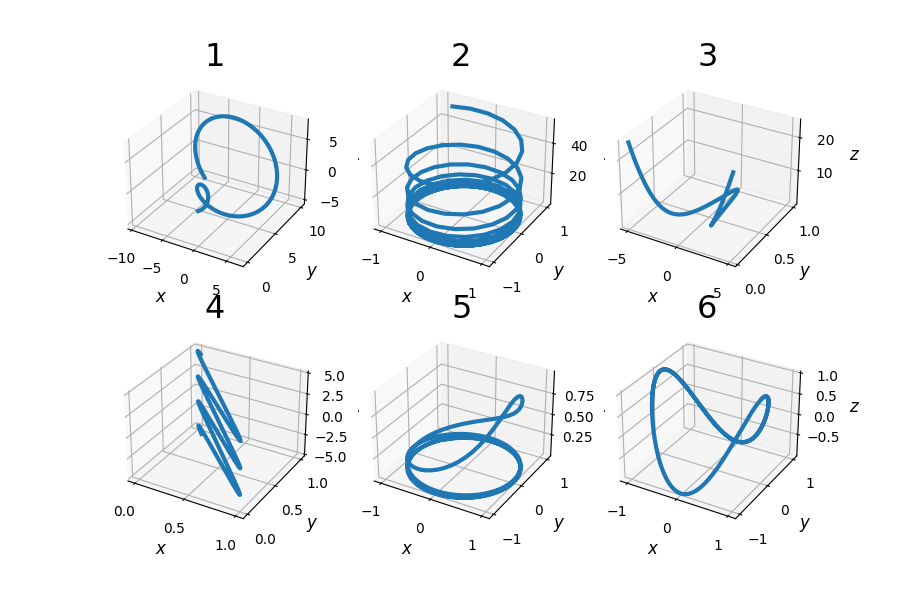

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE, figsize=(9,6))
    plt.ion()

    rr = list(range(6))
    np.random.shuffle(rr)
    rr
    tt = np.linspace(0,10,250)

    funs = [lambda t: np.array((t*cos(t),t,t*sin(t))),
            lambda t: np.array((cos((t-5))**2,sin((t-5))**2,(t-5))),
            lambda t: np.array((cos(t),sin(t),cos(2*t))),
            lambda t: np.array((cos(8*(t-5)),sin(8*(t-5)),np.exp(.8*(t-5)))),
            lambda t: np.array(((t-5),1/(((t-5))**2 + 1),((t-5))**2)),
            lambda t: np.array((cos((3*(t-5))),sin((3*(t-5))),1/(1+((3*(t-5)))**2)))]
    
    for i in range(len(funs)):
            ax = fig.add_subplot(2,3,i+1,projection='3d')
            x,y,z = np.column_stack([funs[rr[i]](t) for t in tt])
            ax.plot(x,y,z,lw=3)
            for c in 'xyz':
    #             getattr(ax,f"set_{c}lim")([-1,1]);    
                getattr(ax,f"set_{c}label")(f"${c}$",size=12)
            ax.set_title(str(i + 1),fontsize=23)
    
    
    return fig.canvas

a("6 curves")

In [15]:
%%html
<style>
    td.stewex {
      font-size: 1.7rem;
      color: black;
      text-justify: left;  
    }
</style>

<table>
    <tr>
        <td class="stewex">A. $$\langle t \cos t, t, t\sin t\rangle$$</td>
        <td class="stewex">B. $$\langle \cos t, \sin t, 1/(1+t^2)\rangle$$</td>
        <td class="stewex">C. $$\langle t, 1/(1+t^2),t^2\rangle$$</td>
        <td class="stewex" rowspan="2"> <img src="../img/l04q1.png" width="250"></td>
    </tr>
    <tr>
         <td class="stewex">D. $$\langle \cos t, \sin t, \cos 2t\rangle$$</td>
         <td class="stewex">E. $$\langle \cos 8t, \sin 8t, e^{0.8t}\rangle$$</td>
         <td class="stewex">F. $$\langle \cos^2 t, \sin^2 t, t\rangle$$</td>
    </tr>
</table>

Respond: <a href="https://forms.gle/JpJMJEkiEbsBBJGo6">https://forms.gle/JpJMJEkiEbsBBJGo6</a>

<p style="padding-bottom:40%;"> </p>

<!-- <img src="../img/l04q1.png" width="1000"> -->

### Resource: 3Demos

I've put up a half-baked site for visulizing 3D objects here: [3demos.surge.sh](https://3demos.surge.sh/). It's still in development, but you can get some decent visualizations of curves and surfaces out of it. 

Alternatively, Paul Seeberger's pioneering [CalcPlot3D](https://c3d.libretexts.org/CalcPlot3D/index.html) or [math3d.org](https://www.math3d.org/).

<p style="padding-bottom:40%;"> </p>

### Example

Parametrize the curve of the intersection of the cylinder $x^2 +y^2 =4 $ and the plane $x-2y+4z=2$.

[Demo](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=false&flipInfo=true&grid=true&obj0_kind=level&obj0_params_g=x%5E2+%2B+y%5E2&obj0_params_k=4&obj0_params_a=-2&obj0_params_b=2&obj0_params_c=-2&obj0_params_d=2&obj0_params_e=-2&obj0_params_f=2&obj1_kind=level&obj1_params_g=x+-+2+y+%2B+4+z&obj1_params_k=2&obj1_params_a=-2&obj1_params_b=2&obj1_params_c=-2&obj1_params_d=2&obj1_params_e=-2&obj1_params_f=2)

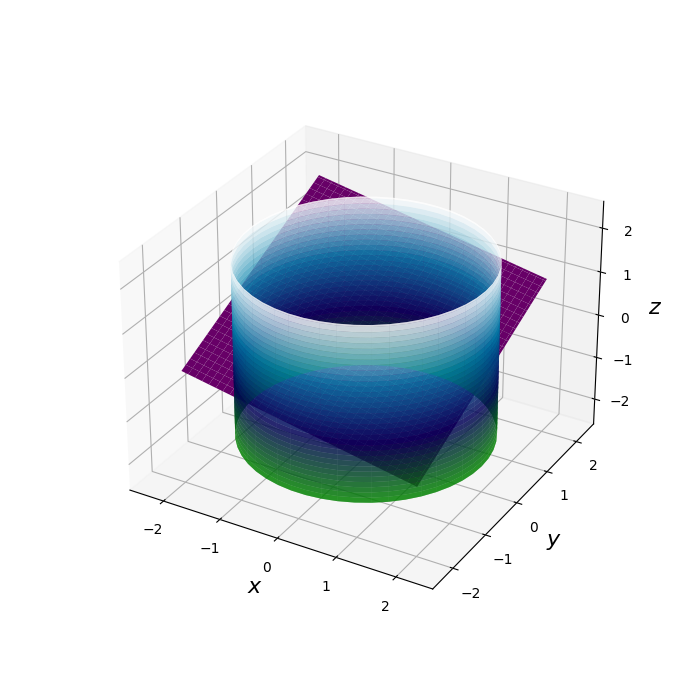

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    x = y = np.linspace(-1,1,101)
    x,y = np.meshgrid(x,y)
    X = 2*cos(2*pi*x)
    Y = 2*sin(2*pi*x)
    Z = 2*y
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean');
    X = 2*x
    Y = 2*y
    Z = (2-X+2*Y)/4
    ax.plot_surface(X,Y,Z,alpha=1,color='purple')
    for c in 'xyz':
            getattr(ax,f"set_{c}lim")([-2.5,2.5]);    
            getattr(ax,f"set_{c}label")(f"${c}$",size=16)
#     ax.set_zlim([0,8])
#     ax.set_zlabel("$z$",size=16)
    
    return fig.canvas

a("An intersection")

<p style="padding-bottom:40%;"> </p>

# Calculus of Vector-Valued Functions

## Limits

Let $\vec r (t) = \langle x(t),y(t),z(t) \rangle$ then the definition of a limit looks nearly identical to that for scalar-valued funtions. $$\lim_{t \to a} \vec r(t) = \vec L $$ if $|\vec r(t) - \vec L|$ gets arbitrarily small as $t$ approaches $a$.

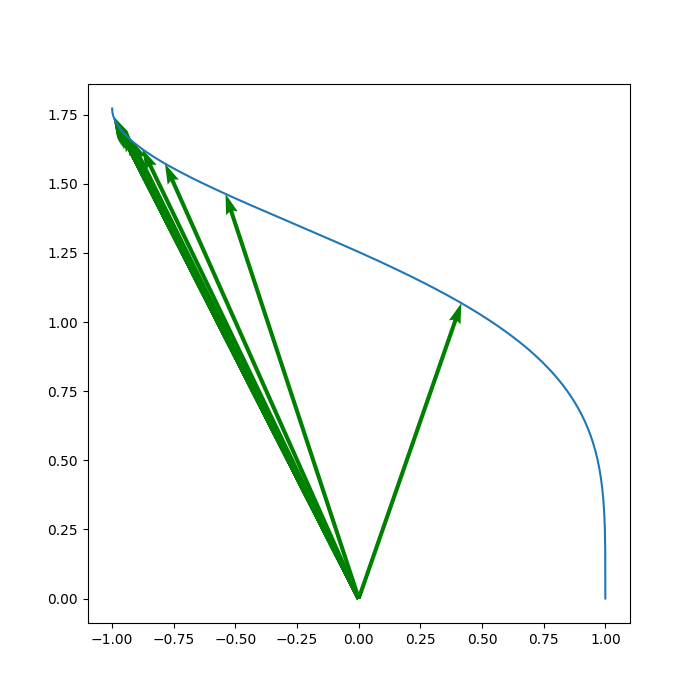

In [7]:
plt.figure("A limit")
plt.gca().clear()
ts = linspace(0, pi, 200)
plt.plot(cos(ts), sqrt(ts))
for n in range(1, 21):
    plt.quiver(0,0,cos(pi - 2/n), sqrt(pi - 2/n), color='g', angles='xy', scale_units='xy', scale=1)
    
plt.show()

<p style="padding-bottom:40%;"> </p>

In other words, $$\lim_{t \to a} \vec r(t) = \bv{\lim_{t \to a} x(t) \\\lim_{t \to a} y(t) \\ \lim_{t \to a} z(t) }$$ where the LHS exists if and only if all limits on the RHS exist.

<p style="padding-bottom:40%;"> </p>

## Derivatives

A similar story happens when we try to import the definition of a derivative to this context. $$\vec r'(t) = \lim_{h \to 0} \frac{\vec r(t+h) - \vec r(t)}{h} $$

$$ = \bv{x'(t) \\ y'(t) \\ z'(t)}$$

... but the geometric view is actually interesting...

<p style="padding-bottom:40%;"> </p>

### Example

Consider the curve $\vec r(t) = \langle -t \cos t, t \sin t \rangle $ in the plane for $t \in [0,2\pi]$. 
  - Compute $\vec r'(\pi/2)$. 
  - Draw several "values" of the difference quotient in the limit definition of the derivative. 
  - Interpret the derivative as a vector. 

In [33]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    ax.set_autoscale_on(True)

    
    r = lambda t: np.array([- t*cos(t),t*sin(t)])
    # r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t)])
    # r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t)])
    
    slider = FloatSlider(value=1, min=-.5, max = 1, step = .01, orientation="vertical", description="$h$")
    h = slider.value
    s = linspace(0,pi,300)
    
    X,Y = np.column_stack([r(x) for x in s])
    
    # make axes lines
    ax.plot(X,Y,alpha=1,lw=3);
    ax.plot([-1,pi],[0,0],'gray')
    ax.plot([0,0],[-1,pi],'gray') 
    
    ax.grid(True)
    ax.set_autoscale_on(True)
    
    def update(change):
        h = slider.value
        while ax.collections:
            ax.collections.pop()
        v = r(pi/2+h)-r(pi/2)
        ax.quiver([0,0],[pi/2,pi/2],[v[0],h == 0 and pi/2 or v[0]/h ],[v[1],h == 0 and 1 or v[1]/h],color='g',angles='xy', scale_units='xy', scale=1)
        
    slider.observe(update, names='value')
    update({})
    
    return HBox([slider, fig.canvas])

a("A derivative")

#### 
<p style="padding-bottom:40%;"> </p>

#### Quick exercise

What is the derivative of the parametrized line $$\vec r(t) = \vec p + t \vec v ?$$